In [1]:
# 01.02.2023
import datetime
print("Hoje: {:%d/%m/%Y %H:%M:%S\n}".format(datetime.datetime.now()))
import os
print(os.getcwd())   # get current working directory

Hoje: 16/02/2023 16:39:12

/home/eduardo/reuniao/2Eduardo


In [2]:
# Pared Penaf PaivaWest  PaivaEast PaivaIsland
#    1    2       3         4          5

In [3]:
import time
TStart = time.time()
print('The time is:', time.time())

The time is: 1676565552.9816284


In [4]:
def PP2File(fileName,LIST,modelName):
    file = open(fileName, 'w')
    file.write(modelName)
    file.write("\tWood\tSoil\tResist\tPared\tPenaf\tPaivaW\tPaivaE\tPaivaI\n")
    file.write("#\t+\t-\t+\t#\t#\t#\t#\t#\n")
    k = 0
    for p in LIST:
        k += 1    
        buf = 'P%06d'%(k)+"\t"+'%.4f'%(p[0])+"\t"+'%.4f'%(p[1])+"\t"+'%.4f'%(p[2])+ \
        "\t"+'%d'%(p[3])+"\t"+'%d'%(p[4])+"\t"+'%d'%(p[5])+"\t"+'%d'%(p[6])+"\t"+'%d'%(p[7])+"\n"    
        file.write(buf)
    file.close()

In [5]:
def readPPfile(fileName):
    file = open(fileName, 'r')
    Lines = file.readlines()
    file.close()
    #------------------
    LIST = []
    for p in Lines[2:]:
        lin = p.split("\t")        
        val = []
        for s in lin[1:]:
            val.append(float(s))    
        LIST.append(val)
    return (LIST)

In [6]:
pntNumber = 0
MasterParPoints = []
#-------------------------------------------functions
def pnt_dominated(pnt):
    # is pnt dominated by MasterParPoints? 
    #print('pnt=', pnt)        
    for k in range(len(MasterParPoints)):        
        #print('COMPAR ', MasterParPoints[k])
        if MasterParPoints[k][0] >= pnt[0] and MasterParPoints[k][1] <= pnt[1] and MasterParPoints[k][2] >= pnt[2]:
            #print('pnt dominated by ',k )
            return True
    return False
    
def insert_pnt(npnt):
    if pnt_dominated(npnt):
        #print ('ignorar')
        return 0
    # elimination of SumParPoints dominated by pnt
    k = 0 
    while k < len(MasterParPoints):        
        if npnt[0] >= MasterParPoints[k][0] and npnt[1] <= MasterParPoints[k][1] and npnt[2] >= MasterParPoints[k][2]:           
            del MasterParPoints[k]
        else:
            k += 1
    MasterParPoints.append(npnt)
    if len(MasterParPoints)%500==0:
        TTemp = time.time()
        print('pnt={:>10d}. ParPnt={:>6d}. Time  : {:>9.2f}'.format(pntNumber,len(MasterParPoints), TTemp - TStart))
    return 1


In [7]:
def filter(PPSet, nReg = -1):
    # nReg:  1  2  3   4  5
    # nReg = 0 : não alterar os indices dos pontos 
    global MasterParPoints
    global TStart, TFinish
    global pntNumber
    
    MasterParPoints = []
    pntNumber = 0
    
    TStart = time.time()
    pntNumber = 0
    
    for i in range(len(PPSet)):
        if nReg < 0:
            newp = [0,0,0]
        elif nReg == 0:
            newp = [0,0,0,  0,0,0,0,0]
            for k in range(8):
                newp[k] = PPSet[i][k]
        else:
            newp = [0,0,0,  0,0,0,0,0]
            newp[nReg+2] = i+1
        for k in range(3):
            newp[k] = PPSet[i][k]        
        insert_pnt(newp)
        pntNumber = pntNumber + 1    
    
    TFinish = time.time()
    print(len(MasterParPoints))
    print('Time  : {:>9.2f}'.format(TFinish - TStart))
    ResultSet = MasterParPoints.copy()
    return ResultSet   

In [8]:
def Arred3d(LIST, mult):
    for p in LIST:
        for k in range(3):
            p[k] = int(p[k]*mult[k] + 0.5)/mult[k]        

In [9]:
def pntclr(x3, x3_min, x3_max):
    clrs = ['red','orange', 'yellow','green', 'lightblue', 'blue', 'magenta']
    n = int(((x3 - x3_min)/(x3_max - x3_min))*6+0.5)
    if n<0:
        n = 0
    elif n>6:
        n = 6
    return clrs[n]

In [10]:
######################################################

In [11]:
ParPenPP = readPPfile('ParPenPP.vmt')
len(ParPenPP)

814

In [12]:
ParPenPP[:5]

[[2.8147, 2.4447, 20.944],
 [2.8145, 2.4448, 20.945],
 [2.8145, 2.4447, 20.945],
 [2.8139, 2.4423, 20.948],
 [2.8147, 2.4449, 20.944]]

In [13]:
ParPenPPF = filter(ParPenPP,1)
len(ParPenPPF)

219
Time  :      0.04


219

In [14]:
ParPenPPF[:5]

[[2.8147, 2.4447, 20.944, 1, 0, 0, 0, 0],
 [2.8145, 2.4447, 20.945, 3, 0, 0, 0, 0],
 [2.8139, 2.4423, 20.948, 4, 0, 0, 0, 0],
 [2.814, 2.4425, 20.948, 7, 0, 0, 0, 0],
 [2.8093, 2.4391, 20.96, 9, 0, 0, 0, 0]]

In [15]:
# Numeração dos pontos da subregião a partir de 1!

In [16]:
PP2File("ParPenPPF.vmt",ParPenPPF,"ParPenF")

2.7909 2.815
2.4358 2.445
20.94 20.988


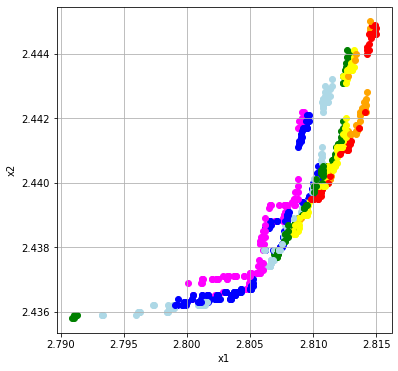

Time  :     15.47


In [17]:
PPSet = ParPenPP
TStart = time.time()
X1 = [PPSet[i][0] for i in range(len(PPSet))]
X2 = [PPSet[i][1] for i in range(len(PPSet))]
X3 = [PPSet[i][2] for i in range(len(PPSet))]
x1_min = min(X1); x1_max = max(X1)
print(x1_min, x1_max)
x2_min = min(X2); x2_max = max(X2)
print(x2_min, x2_max)
x3_min = min(X3); x3_max = max(X3)
print(x3_min, x3_max)
#################################

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(6,6))
for i in range(len(X1)):
    plt.scatter(X1[i],X2[i], color=pntclr(X3[i],x3_min,x3_max))
plt.xlabel('x1')    
plt.ylabel('x2')    
plt.grid()    
plt.show()  
TFinish = time.time()
print('Time  : {:>9.2f}'.format(TFinish - TStart))

2.7911 2.815
2.4358 2.4447
20.941 20.988


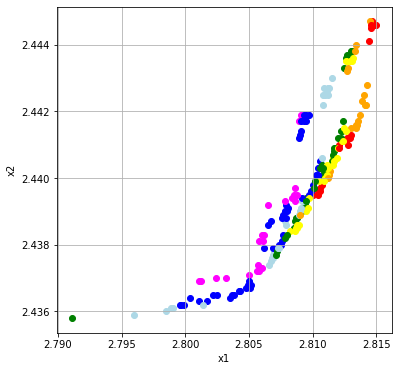

Time  :      3.93


In [18]:
PPSet = ParPenPPF
TStart = time.time()
X1 = [PPSet[i][0] for i in range(len(PPSet))]
X2 = [PPSet[i][1] for i in range(len(PPSet))]
X3 = [PPSet[i][2] for i in range(len(PPSet))]
x1_min = min(X1); x1_max = max(X1)
print(x1_min, x1_max)
x2_min = min(X2); x2_max = max(X2)
print(x2_min, x2_max)
x3_min = min(X3); x3_max = max(X3)
print(x3_min, x3_max)
#################################

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(6,6))
for i in range(len(X1)):
    plt.scatter(X1[i],X2[i], color=pntclr(X3[i],x3_min,x3_max))
plt.xlabel('x1')    
plt.ylabel('x2')    
plt.grid()    
plt.show()    
TFinish = time.time()
print('Time  : {:>9.2f}'.format(TFinish - TStart))

In [19]:
PaivaWestPP = readPPfile('PaivaWestPP.vmt')
len(PaivaWestPP)

742

In [20]:
PaivaWestPP[:5]

[[2.2948, 2.6232, 17.355],
 [2.2948, 2.6232, 17.355],
 [2.2948, 2.6231, 17.355],
 [2.2944, 2.6224, 17.352],
 [2.2944, 2.6224, 17.352]]

In [21]:
PaivaWestPPF = filter(PaivaWestPP, 3)
len(PaivaWestPPF)

251
Time  :      0.04


251

In [22]:
PaivaWestPPF[:5]

[[2.2948, 2.6231, 17.355, 0, 0, 3, 0, 0],
 [2.2944, 2.6223, 17.352, 0, 0, 6, 0, 0],
 [2.2945, 2.6227, 17.353, 0, 0, 7, 0, 0],
 [2.2946, 2.6233, 17.356, 0, 0, 8, 0, 0],
 [2.2958, 2.625, 17.361, 0, 0, 21, 0, 0]]

In [23]:
PP2File("PaivaWestPPF.vmt",PaivaWestPPF,"PWestF")

In [24]:
PaivaEastPP = readPPfile('PaivaEastPP.vmt')
len(PaivaEastPP)

681

In [25]:
PaivaEastPP[:5]

[[0.3712, 0.5059, 2.981],
 [0.3716, 0.5083, 2.986],
 [0.3724, 0.5098, 2.983],
 [0.3719, 0.506, 2.98],
 [0.3717, 0.5083, 2.986]]

In [26]:
PaivaEastPPF = filter(PaivaEastPP,4)
len(PaivaEastPPF)

362
Time  :      0.06


362

In [27]:
PaivaEastPPF[:5]

[[0.3724, 0.5098, 2.983, 0, 0, 0, 3, 0],
 [0.3719, 0.506, 2.98, 0, 0, 0, 4, 0],
 [0.3717, 0.5083, 2.986, 0, 0, 0, 5, 0],
 [0.3723, 0.5083, 2.985, 0, 0, 0, 6, 0],
 [0.3724, 0.5086, 2.982, 0, 0, 0, 7, 0]]

In [28]:
PP2File("PaivaEastPPF.vmt",PaivaEastPPF,"PEastF")

In [29]:
PaivaIslandsPP = readPPfile('PaivaIslandsPP.vmt')
len(PaivaIslandsPP)

579

In [30]:
PaivaIslandsPP[:5]

[[0.3446, 0.3875, 2.347],
 [0.3289, 0.3781, 2.371],
 [0.329, 0.3781, 2.371],
 [0.3291, 0.3782, 2.371],
 [0.3291, 0.3782, 2.371]]

In [31]:
PaivaIslandsPPF = filter(PaivaIslandsPP,5)
len(PaivaIslandsPPF)

285
Time  :      0.04


285

In [32]:
PaivaIslandsPPF[:5]

[[0.329, 0.3781, 2.371, 0, 0, 0, 0, 3],
 [0.3306, 0.3786, 2.386, 0, 0, 0, 0, 6],
 [0.3299, 0.3782, 2.376, 0, 0, 0, 0, 7],
 [0.3316, 0.3787, 2.385, 0, 0, 0, 0, 8],
 [0.3309, 0.3783, 2.375, 0, 0, 0, 0, 10]]

In [33]:
PP2File("PaivaIslandsPPF.vmt",PaivaIslandsPPF,"PIslanF")

2.2881 2.2991
2.6152 2.6303
17.343 17.383


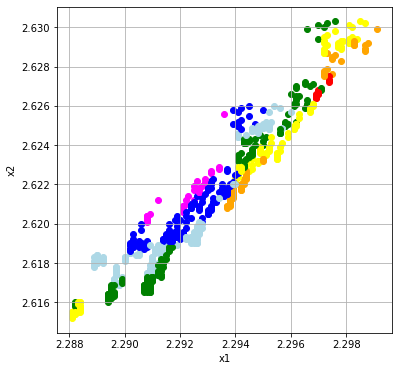

Time  :     13.03


In [34]:
PPSet = PaivaWestPP
TStart = time.time()
X1 = [PPSet[i][0] for i in range(len(PPSet))]
X2 = [PPSet[i][1] for i in range(len(PPSet))]
X3 = [PPSet[i][2] for i in range(len(PPSet))]
x1_min = min(X1); x1_max = max(X1)
print(x1_min, x1_max)
x2_min = min(X2); x2_max = max(X2)
print(x2_min, x2_max)
x3_min = min(X3); x3_max = max(X3)
print(x3_min, x3_max)
#################################

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(6,6))
for i in range(len(X1)):
    plt.scatter(X1[i],X2[i], color=pntclr(X3[i],x3_min,x3_max))
plt.xlabel('x1')    
plt.ylabel('x2')    
plt.grid()    
plt.show()
TFinish = time.time()
print('Time  : {:>9.2f}'.format(TFinish - TStart))

2.2881 2.2991
2.6152 2.6303
17.343 17.383


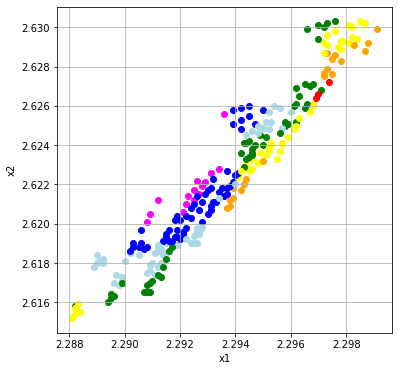

Time  :      4.32


In [35]:
PPSet = PaivaWestPPF
TStart = time.time()
X1 = [PPSet[i][0] for i in range(len(PPSet))]
X2 = [PPSet[i][1] for i in range(len(PPSet))]
X3 = [PPSet[i][2] for i in range(len(PPSet))]
x1_min = min(X1); x1_max = max(X1)
print(x1_min, x1_max)
x2_min = min(X2); x2_max = max(X2)
print(x2_min, x2_max)
x3_min = min(X3); x3_max = max(X3)
print(x3_min, x3_max)
#################################

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(6,6))
for i in range(len(X1)):
    plt.scatter(X1[i],X2[i], color=pntclr(X3[i],x3_min,x3_max))
plt.xlabel('x1')    
plt.ylabel('x2')    
plt.grid()    
plt.show() 
TFinish = time.time()
print('Time  : {:>9.2f}'.format(TFinish - TStart))

In [36]:
len(ParPenPP),len(PaivaWestPP),len(PaivaEastPP),len(PaivaIslandsPP)

(814, 742, 681, 579)

In [37]:
len(ParPenPPF),len(PaivaWestPPF),len(PaivaEastPPF),len(PaivaIslandsPPF)

(219, 251, 362, 285)

In [38]:
##################################################################

In [39]:
MasterParPoints = []   

TStart = time.time()
pntNumber = 0
#---------------------------------Joining Paivas
print("Joining Paiva West + East")

for i in range(len(PaivaWestPPF)):
    for j in range(len(PaivaEastPPF)):
        newp = [0,0,0,  0,0,0,0,0]
        for k in range(3):
            newp[k] = PaivaWestPPF[i][k] + PaivaEastPPF[j][k]
        newp[5] = PaivaWestPPF[i][5]
        newp[6] = PaivaEastPPF[j][6]
        insert_pnt(newp)
        pntNumber = pntNumber + 1

TFinish = time.time()
print("Joined West+East")
print(len(MasterParPoints))
print('Time  : {:>9.2f}'.format(TFinish - TStart))
PaivaPP_WE = MasterParPoints.copy()
len(PaivaPP_WE)

Joining Paiva West + East
pnt=       987. ParPnt=   500. Time  :      0.09
pnt=      1554. ParPnt=   500. Time  :      0.19
pnt=      1576. ParPnt=   500. Time  :      0.20
pnt=      1581. ParPnt=   500. Time  :      0.20
pnt=      1642. ParPnt=   500. Time  :      0.22
pnt=      1701. ParPnt=   500. Time  :      0.24
pnt=      1715. ParPnt=   500. Time  :      0.24
pnt=      1730. ParPnt=   500. Time  :      0.24
pnt=      1733. ParPnt=   500. Time  :      0.25
pnt=      1743. ParPnt=   500. Time  :      0.25
pnt=      1828. ParPnt=   500. Time  :      0.27
pnt=      7562. ParPnt=  1000. Time  :      0.92
pnt=      7567. ParPnt=  1000. Time  :      0.92
pnt=     15419. ParPnt=  1500. Time  :      2.29
pnt=     33773. ParPnt=  2000. Time  :      6.68
pnt=     33837. ParPnt=  2000. Time  :      6.69
pnt=     59467. ParPnt=  2500. Time  :     14.26
pnt=     60431. ParPnt=  2500. Time  :     14.45
pnt=     60553. ParPnt=  2500. Time  :     14.48
pnt=     60641. ParPnt=  2500. Time  :     

2779

2.6571 2.6791
3.1139 3.1526
20.275 20.369


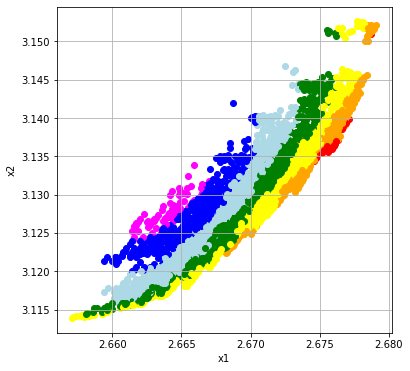

Time  :     65.72


In [40]:
PPSet = PaivaPP_WE
TStart = time.time()
X1 = [PPSet[i][0] for i in range(len(PPSet))]
X2 = [PPSet[i][1] for i in range(len(PPSet))]
X3 = [PPSet[i][2] for i in range(len(PPSet))]
x1_min = min(X1); x1_max = max(X1)
print(x1_min, x1_max)
x2_min = min(X2); x2_max = max(X2)
print(x2_min, x2_max)
x3_min = min(X3); x3_max = max(X3)
print(x3_min, x3_max)
#################################

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(6,6))
for i in range(len(X1)):
    plt.scatter(X1[i],X2[i], color=pntclr(X3[i],x3_min, x3_max))
plt.xlabel('x1')    
plt.ylabel('x2')    
plt.grid()    
plt.show() 
TFinish = time.time()
print('Time  : {:>9.2f}'.format(TFinish - TStart))

2.6571 2.6791
3.1139 3.1526
20.275 20.369


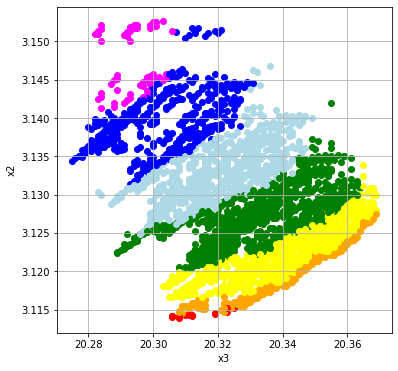

Time  :     65.40


In [41]:
PPSet = PaivaPP_WE
TStart = time.time()
X1 = [PPSet[i][0] for i in range(len(PPSet))]
X2 = [PPSet[i][1] for i in range(len(PPSet))]
X3 = [PPSet[i][2] for i in range(len(PPSet))]
x1_min = min(X1); x1_max = max(X1)
print(x1_min, x1_max)
x2_min = min(X2); x2_max = max(X2)
print(x2_min, x2_max)
x3_min = min(X3); x3_max = max(X3)
print(x3_min, x3_max)
#################################

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(6,6))
for i in range(len(X1)):
    plt.scatter(X3[i],X2[i], color=pntclr(X1[i],x1_min, x1_max))
plt.xlabel('x3')    
plt.ylabel('x2')    
plt.grid()    
plt.show() 
TFinish = time.time()
print('Time  : {:>9.2f}'.format(TFinish - TStart))

In [42]:
PP2File("PaivaPP_WE.vmt", PaivaPP_WE, "Paiva_WE")

In [43]:
MasterParPoints = []   

TStart = time.time()
pntNumber = 0
#---------------------------------Joining Paivas
print("Joining Paiva WestEast + Islands")

for i in range(len(PaivaPP_WE)):
    for j in range(len(PaivaIslandsPPF)):
        newp = [0,0,0,  0,0,0,0,0]
        for k in range(3):
            newp[k] = PaivaPP_WE[i][k] + PaivaIslandsPPF[j][k]
        newp[5] = PaivaPP_WE[i][5]
        newp[6] = PaivaPP_WE[i][6]
        newp[7] = PaivaIslandsPPF[j][7]
        insert_pnt(newp)
        pntNumber = pntNumber + 1 

TFinish = time.time()
print("Joined Paiva WestEast+Islands")
print(len(MasterParPoints))
print('Time  : {:>9.2f}'.format(TFinish - TStart))
Paiva_WEI = MasterParPoints.copy()
len(Paiva_WEI)

Joining Paiva WestEast + Islands
pnt=       976. ParPnt=   500. Time  :      0.40
pnt=      2691. ParPnt=  1000. Time  :      0.74
pnt=      3893. ParPnt=  1500. Time  :      1.27
pnt=      3895. ParPnt=  1500. Time  :      1.27
pnt=      3920. ParPnt=  1500. Time  :      1.28
pnt=     14673. ParPnt=  2000. Time  :      5.15
pnt=     14854. ParPnt=  2000. Time  :      5.27
pnt=     15566. ParPnt=  2000. Time  :      5.76
pnt=     15832. ParPnt=  2000. Time  :      5.87
pnt=     15858. ParPnt=  2000. Time  :      5.90
pnt=     15859. ParPnt=  2000. Time  :      5.90
pnt=     15860. ParPnt=  2000. Time  :      5.90
pnt=     15912. ParPnt=  2000. Time  :      5.92
pnt=     15913. ParPnt=  2000. Time  :      5.93
pnt=     15914. ParPnt=  2000. Time  :      5.93
pnt=     15918. ParPnt=  2000. Time  :      5.93
pnt=     15919. ParPnt=  2000. Time  :      5.93
pnt=     22255. ParPnt=  2500. Time  :      8.46
pnt=     26704. ParPnt=  2500. Time  :     10.00
pnt=     45054. ParPnt=  3000. Time 

8699

2.9861 3.0248
3.492 3.5402
22.642 22.78


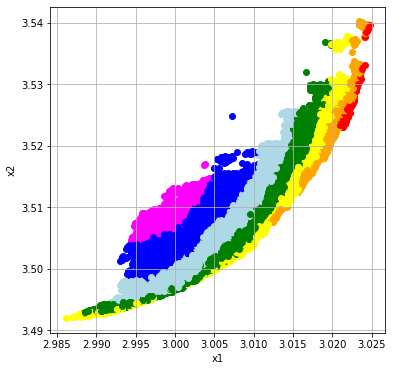

Time  :    409.43


In [44]:
PPSet = Paiva_WEI
TStart = time.time()
X1 = [PPSet[i][0] for i in range(len(PPSet))]
X2 = [PPSet[i][1] for i in range(len(PPSet))]
X3 = [PPSet[i][2] for i in range(len(PPSet))]
x1_min = min(X1); x1_max = max(X1)
print(x1_min, x1_max)
x2_min = min(X2); x2_max = max(X2)
print(x2_min, x2_max)
x3_min = min(X3); x3_max = max(X3)
print(x3_min, x3_max)
#################################

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(6,6))
for i in range(len(X1)):
    plt.scatter(X1[i],X2[i], color=pntclr(X3[i],x3_min, x3_max))
plt.xlabel('x1')    
plt.ylabel('x2')    
plt.grid()    
plt.show()  
TFinish = time.time()
print('Time  : {:>9.2f}'.format(TFinish - TStart))

2.9861 3.0248
3.492 3.5402
22.642 22.78


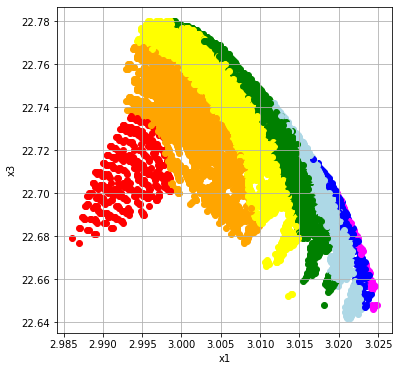

Time  :    409.15


In [45]:
PPSet = Paiva_WEI
TStart = time.time()
X1 = [PPSet[i][0] for i in range(len(PPSet))]
X2 = [PPSet[i][1] for i in range(len(PPSet))]
X3 = [PPSet[i][2] for i in range(len(PPSet))]
x1_min = min(X1); x1_max = max(X1)
print(x1_min, x1_max)
x2_min = min(X2); x2_max = max(X2)
print(x2_min, x2_max)
x3_min = min(X3); x3_max = max(X3)
print(x3_min, x3_max)
#################################

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(6,6))
for i in range(len(X1)):
    plt.scatter(X1[i],X3[i], color=pntclr(X2[i],x2_min, x2_max))
plt.xlabel('x1')    
plt.ylabel('x3')    
plt.grid()    
plt.show()    
TFinish = time.time()
print('Time  : {:>9.2f}'.format(TFinish - TStart))

2.9861 3.0248
3.492 3.5402
22.642 22.78


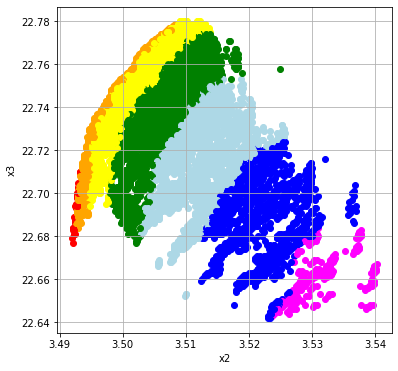

Time  :    416.40


In [46]:
PPSet = Paiva_WEI
TStart = time.time()
X1 = [PPSet[i][0] for i in range(len(PPSet))]
X2 = [PPSet[i][1] for i in range(len(PPSet))]
X3 = [PPSet[i][2] for i in range(len(PPSet))]
x1_min = min(X1); x1_max = max(X1)
print(x1_min, x1_max)
x2_min = min(X2); x2_max = max(X2)
print(x2_min, x2_max)
x3_min = min(X3); x3_max = max(X3)
print(x3_min, x3_max)
#################################

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(6,6))
for i in range(len(X1)):
    plt.scatter(X2[i],X3[i], color=pntclr(X1[i],x1_min, x1_max))
plt.xlabel('x2')    
plt.ylabel('x3')    
plt.grid()    
plt.show()   
TFinish = time.time()
print('Time  : {:>9.2f}'.format(TFinish - TStart))

In [47]:
# West + East + Islands  DIRECTLY
"""
MasterParPoints = []
pntNumber = 0

TStart = time.time()
#--------------------------------Direct joining Paivas
print("Joining Paiva West + East + Islands directly")

for i in range(len(PaivaWestPPF)):
    for j in range(len(PaivaEastPPF)):
        for r in range(len(PaivaIslandsPPF)):            
            newp = [0,0,0,  0,0,0,0,0]
            for k in range(3):                
                newp[k] = PaivaWestPPF[i][k] + PaivaEastPPF[j][k] + PaivaIslandsPPF[r][k]
            newp[5] = PaivaWestPPF[i][5]
            newp[6] = PaivaEastPPF[j][6]
            newp[7] = PaivaIslandsPPF[r][7]
            pntNumber = pntNumber + 1
            insert_pnt(newp)

TFinish = time.time()
print("Joined West+East+Islands")
print(len(MasterParPoints))
print('Time  : {:>9.2f}'.format(TFinish - TStart))
Paiva_d = MasterParPoints.copy()
len(Paiva_d)
"""

'\nMasterParPoints = []\npntNumber = 0\n\nTStart = time.time()\n#--------------------------------Direct joining Paivas\nprint("Joining Paiva West + East + Islands directly")\n\nfor i in range(len(PaivaWestPPF)):\n    for j in range(len(PaivaEastPPF)):\n        for r in range(len(PaivaIslandsPPF)):            \n            newp = [0,0,0,  0,0,0,0,0]\n            for k in range(3):                \n                newp[k] = PaivaWestPPF[i][k] + PaivaEastPPF[j][k] + PaivaIslandsPPF[r][k]\n            newp[5] = PaivaWestPPF[i][5]\n            newp[6] = PaivaEastPPF[j][6]\n            newp[7] = PaivaIslandsPPF[r][7]\n            pntNumber = pntNumber + 1\n            insert_pnt(newp)\n\nTFinish = time.time()\nprint("Joined West+East+Islands")\nprint(len(MasterParPoints))\nprint(\'Time  : {:>9.2f}\'.format(TFinish - TStart))\nPaiva_d = MasterParPoints.copy()\nlen(Paiva_d)\n'

In [48]:
#########################################

In [49]:
PP2File("PaivaPP_WEI.vmt", Paiva_WEI, "Paiva")

In [50]:
Paiva_WEI[:5]

[[3.0136999999999996, 3.5103999999999997, 22.678, 0, 0, 3, 450, 103],
 [3.0134999999999996, 3.5099, 22.676, 0, 0, 3, 452, 103],
 [3.0132999999999996, 3.5096, 22.675, 0, 0, 6, 450, 103],
 [3.0134, 3.51, 22.676000000000002, 0, 0, 7, 450, 103],
 [3.0149, 3.5128000000000004, 22.684, 0, 0, 21, 404, 103]]

In [51]:
Paiva_WEI2 = readPPfile("PaivaPP_WEI.vmt")

In [52]:
Paiva_WEI2[:5]

[[3.0137, 3.5104, 22.678, 0.0, 0.0, 3.0, 450.0, 103.0],
 [3.0135, 3.5099, 22.676, 0.0, 0.0, 3.0, 452.0, 103.0],
 [3.0133, 3.5096, 22.675, 0.0, 0.0, 6.0, 450.0, 103.0],
 [3.0134, 3.51, 22.676, 0.0, 0.0, 7.0, 450.0, 103.0],
 [3.0149, 3.5128, 22.684, 0.0, 0.0, 21.0, 404.0, 103.0]]

In [53]:
Paiva_WEIF = filter(Paiva_WEI2, 0)
len(Paiva_WEIF)

pnt=       573. ParPnt=   500. Time  :      0.08
pnt=      1148. ParPnt=  1000. Time  :      0.29
pnt=      1719. ParPnt=  1500. Time  :      0.65
pnt=      2284. ParPnt=  2000. Time  :      1.14
pnt=      2907. ParPnt=  2500. Time  :      1.83
pnt=      3538. ParPnt=  3000. Time  :      2.67
pnt=      4124. ParPnt=  3500. Time  :      3.65
pnt=      4811. ParPnt=  4000. Time  :      4.89
pnt=      4812. ParPnt=  4000. Time  :      4.90
pnt=      5606. ParPnt=  4500. Time  :      6.34
pnt=      5607. ParPnt=  4500. Time  :      6.34
pnt=      6375. ParPnt=  5000. Time  :      8.07
pnt=      6376. ParPnt=  5000. Time  :      8.08
pnt=      6377. ParPnt=  5000. Time  :      8.08
pnt=      7110. ParPnt=  5500. Time  :      9.94
pnt=      7745. ParPnt=  6000. Time  :     11.81
pnt=      8418. ParPnt=  6500. Time  :     13.91
6696
Time  :     14.76


6696

In [54]:
Paiva_WEIF[:5]

[[3.0135, 3.5099, 22.676, 0.0, 0.0, 3.0, 452.0, 103.0],
 [3.0133, 3.5096, 22.675, 0.0, 0.0, 6.0, 450.0, 103.0],
 [3.0149, 3.5128, 22.684, 0.0, 0.0, 21.0, 404.0, 103.0],
 [3.0147, 3.5123, 22.684, 0.0, 0.0, 21.0, 450.0, 103.0],
 [3.0145, 3.5118, 22.682, 0.0, 0.0, 21.0, 452.0, 103.0]]

2.9861 3.0248
3.492 3.5402
22.642 22.78


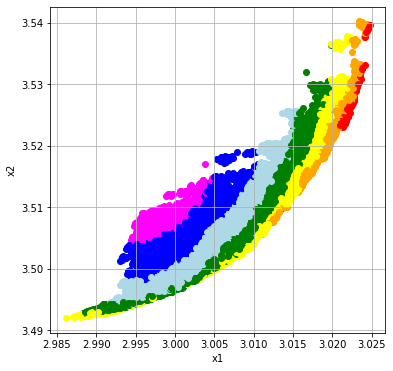

Time  :    261.94


In [55]:
PPSet = Paiva_WEIF
TStart = time.time()
X1 = [PPSet[i][0] for i in range(len(PPSet))]
X2 = [PPSet[i][1] for i in range(len(PPSet))]
X3 = [PPSet[i][2] for i in range(len(PPSet))]
x1_min = min(X1); x1_max = max(X1)
print(x1_min, x1_max)
x2_min = min(X2); x2_max = max(X2)
print(x2_min, x2_max)
x3_min = min(X3); x3_max = max(X3)
print(x3_min, x3_max)
#################################

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(6,6))
for i in range(len(X1)):
    plt.scatter(X1[i],X2[i], color=pntclr(X3[i],x3_min, x3_max))
plt.xlabel('x1')    
plt.ylabel('x2')    
plt.grid()    
plt.show()  
TFinish = time.time()
print('Time  : {:>9.2f}'.format(TFinish - TStart))

# ====================================

In [56]:
# Joining ParPen + Paiva 

In [57]:
len(ParPenPPF), len(Paiva_WEIF), len(ParPenPPF)*len(Paiva_WEIF) 

(219, 6696, 1466424)

In [58]:
MasterParPoints = []   

TStart = time.time()
pntNumber = 0
#---------------------------------Joining Paivas
print("Joining ParPen + Paiva")

for i in range(len(ParPenPPF)):
    for j in range(len(Paiva_WEIF)):
        newp = [0,0,0,  0,0,0,0,0]
        for k in range(3):
            newp[k] = ParPenPPF[i][k] + Paiva_WEIF[j][k]
        newp[3] = ParPenPPF[i][3]
        newp[4] = ParPenPPF[i][4]
        newp[5] = Paiva_WEIF[j][5]
        newp[6] = Paiva_WEIF[j][6]
        newp[7] = Paiva_WEIF[j][7]
        insert_pnt(newp)
        pntNumber = pntNumber + 1 

TFinish = time.time()
print("Joined ParPen + Paiva")
print(len(MasterParPoints))
print('Time  : {:>9.2f}'.format(TFinish - TStart))
ValeSousaPP = MasterParPoints.copy()
len(ValeSousaPP)

Joining ParPen + Paiva
pnt=       499. ParPnt=   500. Time  :      0.07
pnt=       999. ParPnt=  1000. Time  :      0.27
pnt=      1499. ParPnt=  1500. Time  :      0.58
pnt=      1999. ParPnt=  2000. Time  :      1.01
pnt=      2499. ParPnt=  2500. Time  :      1.58
pnt=      2999. ParPnt=  3000. Time  :      2.27
pnt=      3499. ParPnt=  3500. Time  :      3.08
pnt=      3999. ParPnt=  4000. Time  :      4.03
pnt=      4499. ParPnt=  4500. Time  :      5.09
pnt=      4999. ParPnt=  5000. Time  :      6.27
pnt=      5499. ParPnt=  5500. Time  :      7.59
pnt=      5999. ParPnt=  6000. Time  :      9.08
pnt=      6499. ParPnt=  6500. Time  :     10.74
pnt=      8375. ParPnt=  7000. Time  :     14.48
pnt=      8376. ParPnt=  7000. Time  :     14.48
pnt=     11188. ParPnt=  7500. Time  :     20.91
pnt=     13827. ParPnt=  7500. Time  :     26.33
pnt=     13828. ParPnt=  7500. Time  :     26.33
pnt=     16396. ParPnt=  4000. Time  :     33.45
pnt=     17003. ParPnt=  4500. Time  :     34.

17141

In [59]:
PP2File("1mWithLock"+str(len(ValeSousaPP))+".vmt", ValeSousaPP, "VSousa")

In [60]:
ValeSousaPP[:5]

[[5.8359000000000005, 5.976, 43.632, 1, 0, 212.0, 93.0, 103.0],
 [5.8387, 5.984500000000001, 43.607, 1, 0, 223.0, 91.0, 65.0],
 [5.8372, 5.9821, 43.623, 1, 0, 223.0, 91.0, 103.0],
 [5.838, 5.978, 43.611999999999995, 1, 0, 223.0, 93.0, 65.0],
 [5.8359000000000005, 5.9757, 43.631, 1, 0, 223.0, 93.0, 86.0]]

In [61]:
ValeSousaPP2 = readPPfile("1mWithLock"+str(len(ValeSousaPP))+".vmt")
ValeSousaPP2[:5]

[[5.8359, 5.976, 43.632, 1.0, 0.0, 212.0, 93.0, 103.0],
 [5.8387, 5.9845, 43.607, 1.0, 0.0, 223.0, 91.0, 65.0],
 [5.8372, 5.9821, 43.623, 1.0, 0.0, 223.0, 91.0, 103.0],
 [5.838, 5.978, 43.612, 1.0, 0.0, 223.0, 93.0, 65.0],
 [5.8359, 5.9757, 43.631, 1.0, 0.0, 223.0, 93.0, 86.0]]

In [62]:
ValeSousaPP2F = filter(ValeSousaPP2, 0)
len(ValeSousaPP2F)

pnt=       507. ParPnt=   500. Time  :      0.07
pnt=      1066. ParPnt=  1000. Time  :      0.28
pnt=      1611. ParPnt=  1500. Time  :      0.63
pnt=      2112. ParPnt=  2000. Time  :      1.09
pnt=      2619. ParPnt=  2500. Time  :      1.67
pnt=      3134. ParPnt=  3000. Time  :      2.39
pnt=      3690. ParPnt=  3500. Time  :      3.29
pnt=      4298. ParPnt=  4000. Time  :      4.32
pnt=      4915. ParPnt=  4500. Time  :      5.52
pnt=      5455. ParPnt=  5000. Time  :      6.91
pnt=      6023. ParPnt=  5500. Time  :      8.57
pnt=      6636. ParPnt=  6000. Time  :     10.34
pnt=      7222. ParPnt=  6500. Time  :     12.20
pnt=      7753. ParPnt=  7000. Time  :     14.08
pnt=      8326. ParPnt=  7500. Time  :     16.29
pnt=      8903. ParPnt=  8000. Time  :     18.57
pnt=      9497. ParPnt=  8500. Time  :     21.01
pnt=     10007. ParPnt=  9000. Time  :     23.48
pnt=     10530. ParPnt=  9500. Time  :     26.19
pnt=     11081. ParPnt= 10000. Time  :     29.15
pnt=     11711. ParP

15143

In [63]:
ValeSousaPP2F[:5]

[[5.8359, 5.976, 43.632, 1.0, 0.0, 212.0, 93.0, 103.0],
 [5.8387, 5.9845, 43.607, 1.0, 0.0, 223.0, 91.0, 65.0],
 [5.8372, 5.9821, 43.623, 1.0, 0.0, 223.0, 91.0, 103.0],
 [5.838, 5.978, 43.612, 1.0, 0.0, 223.0, 93.0, 65.0],
 [5.8365, 5.9756, 43.628, 1.0, 0.0, 223.0, 93.0, 103.0]]

In [64]:
PP2File("1mWithLock"+str(len(ValeSousaPP2F))+".vmt", ValeSousaPP2F, "VSousa")

In [65]:
print("Here")

Here


### ---------------------------------------------